# Regressão Linear
<br/>
<br/>

## Conteúdo

- [Pré-requisitos](#pre_requisitos)
- [Justificativa matemática](#justificativa_matematica)
- [Desenhando e testando o algoritmo](#desenhando_e_testando_o_algoritmo)
- [Indo um pouco além: Projeção com Erros Ortogonais](#indo_um_pouco_alem)
- [Introduzindo relações não lineares](#introduzindo_relacoes_nao_lineares)
- [Recomendações e Considerações Finais](#recomendacoes_e_consideracoes_finais)
- [Ligações Externas](#ligacoes_externas)

<br/>
<a id='pre_requisitos'></a>
## Pré-requisitos

É preciso ter um conhecimento básico de Python, incluindo o mínimo de Python orientado à objetos. Caso não saiba programar, os cursos de [Introdução à Ciencia da Computação](https://br.udacity.com/course/intro-to-computer-science--cs101/) e [Fundamentos de Programação com Python](https://br.udacity.com/course/programming-foundations-with-python--ud036/) fornecem uma base suficiente sobre programação em Python e Python orientado à objetos, respectivamente. Além disso, é necessário ter conhecimento das bibliotecas de manipulação de dados Pandas e Numpy. Alguns bons tutoriais são o [Mini-curso 1](https://br.udacity.com/course/machine-learning-for-trading--ud501/) do curso de Aprendizado de Máquina para Negociação, o site [pythonprogramming.net](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/) ou o primeiro curso do DataCamp em [Python](https://www.datacamp.com/getting-started?step=2&track=python).

Para entender o desenvolvimento do algoritmo de regressão linear é preciso ter o conhecimento de introdução à álgebra linear. Na UnB, a primeira parte do curso de Economia Quantitativa 1 já cobre o conteúdo necessário. Caso queira relembrar ou aprender esse conteúdo, o curso online do MIT de [Introdução à Álgebra Linear](https://www.youtube.com/playlist?list=PLE7DDD91010BC51F8) fornece uma boa base sobre a matemática que será desenvolvida nos algoritmos de aprendizado de máquina.

Conhecimento de cálculo e principalmente otimização é fundamental para o entendimento dos algoritmos de aprendizado de máquina, que muitas vezes são encarados explicitamente como problemas de otimização. Uma noção de cálculo multivariado também ajudará na compreensão dos algoritmos, visto que muitas vezes otimizaremos em várias direções.



<br/>
<a id='justificativa_matematica'></a>
## Justificativa matemática

Imagine que temos dados em tabelas, sendo que cada linha é uma observação e cada coluna uma variável. Nos então escolhemos uma das colunas para ser nossa variável dependente y (aquela que queremos prever) e as outras serão as variáveis independentes (X). Nosso objetivo é aprender como chegar das variáveis independentes na variável dependente, ou, em outras palavras, prever y a partir de X. Note, que X é uma matriz nxd, em que n é o número de observações e d o número de dimensões; y é um vetor coluna nx1. Podemos definir o problema como um sistema de equações, em que cada equação é uma observação:

$\begin{cases} 
w_0 + w_1 x_1 + ... + w_d x_1 = y_1 \\
w_0 + w_1 x_2 + ... + w_d x_2 = y_2 \\
... \\
w_0 + w_1 x_n + ... + w_d x_n = y_n \\
\end{cases}$

Normalmente, $n > d$, isto é, temos mais observações que dimensões. Sistemas assim costumam não ter solução; há muitas equações e poucas variáveis para ajustar. Intuitivamente, pese que, na prática, muitas coisas afetam a variável y. Principalmente se ela for algo de interesse das ciências humanas, como, por exemplo, preço, desemprego, felicidade... E muitas das coisas que afetam y não podem ser coletadas como dados; as equações acima não tem solução porque não temos todos os fatores que afetam y. 

Para lidar com esse problema, vamos adicionar nas equações um termo erro $\varepsilon$ que representará os fatores que não conseguimos observar, erros de medição, etc.

$$\begin{cases} 
w_0 + w_1 x_{11} + ... + w_d x_{1d} +  \varepsilon_1 = y_1 \\
w_0 + w_1 x_{21} + ... + w_d x_{2d} + \varepsilon_2 = y_2 \\
... \\
w_0 + w_1 x_{n1} + ... + w_d x_{nd} + \varepsilon_3 = y_n \\
\end{cases}$$

Em forma de matriz:

$$ \begin{bmatrix}
    1 & x_{11} & ... & x_{1d} \\
    1 & x_{21} & ... & x_{2d} \\
    \vdots &  \vdots&  \vdots &  \vdots \\
    1 & x_{n1} & ... & x_{nd} \\
\end{bmatrix}
\times
\begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_d \\
\end{bmatrix}
+
\begin{bmatrix}
    \varepsilon_0 \\
    \varepsilon_1 \\
    \vdots \\
    \varepsilon_n \\
\end{bmatrix}
=
\begin{bmatrix}
    y_0 \\
    y_1 \\
    \vdots \\
    y_n \\
\end{bmatrix}$$


$$X_{nd} \pmb{w}_{d1} + \pmb{\epsilon}_{n1} = \pmb{y}_{n1}$$



Para estimar a equação acima, usaremos a técnica de Mínimos Quadrados Ordinários (MQO): queremos achar os $\pmb{\hat{w}}$ que minimizam os $n$ $ \varepsilon^2 $, ou, na forma de vetor, $\pmb{\epsilon}^T \pmb{\epsilon}$. Por que minimizar os erros quadrados? Bom, não há uma resposta certa para isso. Note que os erros variam para mais e para menos e tem média zero, de forma que a soma deles será sempre muito próxima de zero. Então temos que fazer algo para que todos os erros sejam positivos. Poderíamos minimizar os erros absolutos, mas a o quadrado dos erros também funciona e deixa a matemática bem mais simples: 

\begin{equation}
\begin{split}
    \pmb{\epsilon}^T  \pmb{\epsilon} &= (\pmb{y} - \pmb{\hat{w}}X)^T(\pmb{y} - \pmb{\hat{w}} X) \\
             &= \pmb{y}^T \pmb{y} - \pmb{\hat{w}}^T X^T \pmb{y} - \pmb{y}^T X \pmb{\hat{w}} + \pmb{\hat{w}} X^T X \pmb{\hat{w}} \\
             &= \pmb{y}^T \pmb{y} - 2\pmb{\hat{w}}^T X^T \pmb{y} + \pmb{\hat{w}} X^T X \pmb{\hat{w}}
\end{split}
\end{equation}

Aqui, usamos o fato que que $\pmb{\hat{w}}^T X^T \pmb{y}$ e $\pmb{y}^T X \pmb{\hat{w}}$ são simplesmente escalares $1x1$ e a transposta de um escalar é o mesmo escalar: $\pmb{\hat{w}}^T X^T \pmb{y} = (\pmb{\hat{w}}^T X^T \pmb{y})^T = \pmb{y}^T X \pmb{\hat{w}}$. Derivando em $\pmb{\hat{w}}$ e achando a CPO:


$$\frac{\partial \pmb{\epsilon}^T \pmb{\epsilon}}{\partial \pmb{\hat{w}}} = -2X^T\pmb{y} + 2X^T X \pmb{\hat{w}} = 0$$


Derivando mais uma vez para checar a CSO chegamos em $2X^TX$, que é positiva definida se as colunas de X forem independentes. Temos então um ponto de mínimo quando:


$$ \pmb{\hat{w}} = (X^T X)^{-1} X^T \pmb{y}$$


Bom, parece que chegamos em algo interessante. Nos nossos dados temos $X$ e $\pmb{y}$, então podemos achar $\hat{\pmb{w}}$ facilmente: basta substituir os valores na fórmula! O próximo passo e desenhar o algoritmo e ver como ele se sai em dados reais.

OBS:  
1) Para mais detalhes, veja [este](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) passo a passo da Universidade de Stanford.  
2) Seria possível chegar em uma fórmula para os vários $\hat{w_i}$ apenas com cálculo multivariado, sem usar álgebra linear. Embora a forma com álgebra linear seja mais difícil (pelo menos foi para mim) ela vai nos ajudar no entendimento de como o algoritmo funciona. Álgebra linear é uma ferramente poderosa de abstração e a vasta maioria dos algoritmos de aprendizado de máquina usam álgebra linear em suas derivações, então é bom já irmos nos acostumando. 

<br/>
<a id='desenhando_e_testando_o_algoritmo'></a>
## Desenhando e testando o algoritmo

In [1]:
import pandas as pd # para ler os dados em tabela
import numpy as np # para álgebra linear
from sklearn import linear_model, model_selection, datasets # para comparar o nosso algoritmo com o de mercado
import matplotlib.pyplot as plt # para fazer gráficos
from matplotlib import style
from time import time # para ver quanto tempo demora
style.use('ggplot') # para gráficos bonitinhos
np.random.seed(1) # para resultados consistentes 

class linear_regr(object):

    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        # adiciona coluna de 1 nos dados
        X = np.insert(X_train, 0, 1, 1)

        # estima os w_hat
        w_hat = np.dot( np.dot( np.linalg.inv(np.dot(X.T, X)), X.T), y_train)
                                    # (X^T * X)^-1 * X^T * y
        self.w_hat = w_hat
        self.coef = self.w_hat[1:]
        self.intercept = self.w_hat[0]

    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, 1) # adiciona coluna de 1 nos dados
        y_pred = np.dot(X, self.w_hat) # X * w_hat = y_hat
        return y_pred


Ok, teoria justificada e algoritmo pronto. Vamos ver se ele consegue aprender os $\hat{\pmb{w}}$ de dados reais.
OBS: Os dados podem ser encontrados em http://www.cengage.com/aise/economics/wooldridge_3e_datasets/.  
  
  
Lendo e processando os dados:

In [2]:
data = pd.read_csv('../data/hprice.csv', sep=',').ix[:, :6] # lendo os dados
data.fillna(-99999, inplace = True) # preenchendo valores vazios
X = np.array(data.drop(['price'], 1)) # escolhendo as variáveis independentes
y = np.array(data['price']) # escolhendo a variável dependente

# separa em bases de treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)
data.head(5)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,price,assess,bdrms,lotsize,sqrft,colonial
0,300.0,349.1,4,6126,2438,1
1,370.0,351.5,3,9903,2076,1
2,191.0,217.7,3,5200,1374,0
3,195.0,231.8,3,4600,1448,1
4,373.0,319.1,4,6095,2514,1


Treinando, testando e comparando o regressor.

In [3]:
t0 = time()
regr = linear_regr()
regr.fit(X_train, y_train)
print("Tempo do criado manualmente:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços

print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())

# comparando com o de mercado
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("\n\nTempo do de mercado:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços
w_hat = regr.intercept_
w_hat = np.append(w_hat, regr.coef_)

print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())


Tempo do criado manualmente: 0.001 s
Média do erro absoluto:  34.9234990043
Média do erro relativo:  0.122915533711


Tempo do de mercado: 0.002 s
Média do erro absoluto:  34.9234990043
Média do erro relativo:  0.122915533711


Nada mal... O erro previsto é, na média, apenas 12,2% diferente do preço real/observado. Note que o algoritmo aprendeu os parâmetros $\hat{\pmb{w}}$ com uma parte dos dados e usou para prever dados que nunca tinha visto, mostando uma boa capacidade de generalização.

O nosso algoritmo produz os mesmos resultados do de mercado, então podemos saber que não erramos nada. Além disso, o nosso algoritmo é mais rápido que o de mercado, mas essa diferênça é insignificante, em termos práticos. Cabe aqui uma observação: **não reinvente a roda!**. Na prática, se existe um bom algorítmo já feito, use-o! Não é preciso fazer o algorítmo do zero sempre, basta importar o do [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)! Aqui, estamos recriando os algorítmos apenas para melhor entendimento de como ele funciona, mas não com intenção de usar nossa criação na prática. Além disso, os algorítmos já pronto são muuuito melhores e mais rápidos que o nosso. O modelo de regressão linear é apenas uma exceção devido à sua simplicidade


A vantágem do modelo de regressão linear é o que chamamos de um modelo caixa branca: nos sabemos exatamente como ele aprende os parâmetros e ainda nos oferece capacidade interpretativa por meios deles. Infelizmente, a capacidade interpretativa depende de um aprofundamento que não é a intenção desse tutorial. Caso queira se aprofundar no alorítmo, veja [1](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) ou [2](https://www.coursera.org/learn/erasmus-econometrics).

Outra vantágem da regressão linear por MQO é que o processo de treinamento é muuuuuito rápido treinar. Muito mesmo. Mesmo com milhões de dados, é possível estimar os parâmetros em menos de um segundo. Além disso, uma vez treinado, o regressor ocupa muito pouco espaço, pois só armazena o vetor $\pmb{\hat{w}}$.

Vale uma nota de atenção: esse algoritmo é a base da econometria e da ciência de dados inferencial no geral. Aqui só podemos abordá-lo brevemente. Ainda há problemas de iferência (saber se os coeficientes são estatisticamente significantes), de interpretação em outras escalar, de hipóteses assumidas e o que fazer quando elas são violadas. Tenha isso em mente na hora de usá-lo! Muita coisa ficou incompleta aqui. Caso tenha interesse em se aprofundar no assunto, apontaremos fontes externas para isso no final do tutorial.

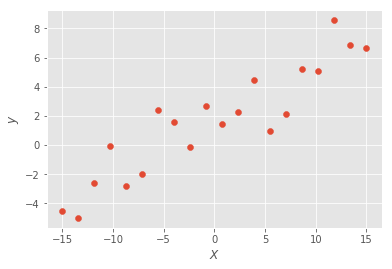

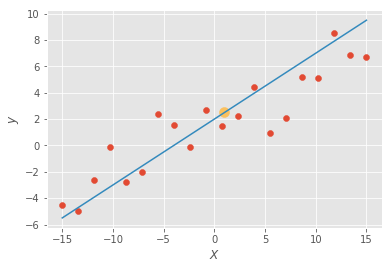

In [4]:
# Código para os gráficos:
np.random.seed(42)
x = np.linspace(-15,15, 20)
y = x * .5 + 2 + np.random.normal(0,2,size=20)
plt.scatter(x, y)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

plt.scatter(x, y)
plt.scatter(1, 1 * .5 + 2, c='C4', s=100) # x=1
plt.plot(x, x * .5 + 2, c='C1')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

<br/>
<a id='indo_um_pouco_alem'></a>   
## Indo um pouco além: Projeção com Erros Ortogonais

Nós chegamos em um fórmula muito útil $\pmb{\hat{w}} = (X^T X)^{-1} X^T \pmb{y}$, mas, para mim, ainda não está claro o que essa fórmula faz, além de minimizar os erros quadrados. O objetivo aqui é entender melhor como o algorítmo funciona por meio de vizualização e exemplos. 

Bom, a primeira coisa que notamos é que $X\pmb{\hat{w}}$ produz $\pmb{\hat{y}}$ e não $\pmb{y}$. Há uma diferênça entre $\pmb{\hat{y}}$ e $\pmb{y}$ que é um resíduo $\pmb{\epsilon}$. Podemos então definir:

\begin{equation}
\begin{split}
    \pmb{\epsilon} &= \pmb{y} - X \pmb{\hat{w}} \\
             &= \pmb{y} - X (X^T X)^{-1} X^T \pmb{y} \\
             &= [I -  X (X^T X)^{-1} X^T] \pmb{y} \\
             &= M\pmb{y}
\end{split}
\end{equation}

Além disso:

\begin{equation}
\begin{split}
    \pmb{\hat{y}} &= \pmb{y} - \pmb{e} \\
             &= [I - M]\pmb{y} \\
             &= X (X^T X)^{-1} X^T \pmb{y}
\end{split}
\end{equation}

Chamaremos $X (X^T X)^{-1} X^T$ de $P$. A matriz $P$ transforma $\pmb{y}$ em $\pmb{\hat{y}}$, mas como? De alguma forma, eu acredito que entender essa matriz é a chave para vizualizar como o algorítmo de MQO funciona. Vamos criar um exemplo hipotético com poucos números para facilitar a vizualização.

In [ ]:
X = np.array([[1, 2],
              [2, 1],
              [3, 4],
              [5, 1],
              [2, 6],
              [3, 3]])
w = np.array([[4], 
              [1]])

y =  np.dot(X, w) + np.reshape(np.random.normal(0, 0.5, 6), (6, 1))

np.round(y, 2)

In [ ]:
P = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)
y_hat = np.dot(P, y)
y_hat

Note como $\pmb{\hat{y}}$ representa a relação linear entre $X$ e $y$ retirando parte do ruido. Por exemplo, para a primeira observação, não fosse o ruido, $y_1$ seria $6$ e $\hat{y_1}$ é bem mais próximo de $6$ do que $y_1$. Se todas as variáveis relevantes estão em $X$, a matrix $P$ pode então ser vista como um filtro de ruido. A forma como eu gosto de vizualizar $P$ é como uma matriz projeção: $P$ projeta o vetor $\pmb{y}$ em $\pmb{\hat{y}}$ de forma que o reíduo seja ortogonal a $\pmb{\hat{y}}$. O resíduo ser ortogonal significa que ele não tem nenhuma relação com $\pmb{\hat{y}}$ e se ele também não tiver correlação com $\pmb{y}$, então estaremos achando a melhor relação entre as variável dependentes e independentes.

Mas isso chama a atenção para um problema muito sério: normalmente não temos todas as variáveis relevantes para explicar um fenômeno. O que acontece nesse caso?

Vamos refazer o exemplo, mas agora, suponha que não possâmos medir a segunda variável.

In [ ]:
x = np.delete(X, 1, 1)
x

Nesse caso, $x$ é apenas um vetor e $X (X^T X)^{-1} X^T$ se reduz para $\frac{1}{k} X X^T$ em que $k = X^T X$. 

In [ ]:
P = np.dot(x, x.T) / np.dot(x.T, x)
y_hat = np.dot(P, y)
y_hat


Note que obtemos agora um resultado divergente do que seria o real sem o ruído. Para a primeira observação, por exemplo, sem ruído teriamos 6, mas a nossa estimativa é menor do que 4! Note que a variável que mais contribui para $y$ é $x_1$ (contribui 4x mais), e mesmo que a tenhamos, simplemente não conseguimos achar o resultado correto se nos falta $x_2$. Lembre que $P$ projeta o vetor $\pmb{y}$ em $\pmb{\hat{y}}$ de forma que os resíduos sejam ortogonais, ou seja, de forma que eles não tenham nenhuma relação com $\pmb{\hat{y}}$. Isso ainda é verdade, mas agora o resíduo tem relação com $\pmb{y}$! Isso acontece porque $\pmb{\epsilon}$ incorpora tudo o que não conseguimos observar e nesse caso não podemos observar uma das variáveis que afeta $\pmb{y}$. Por isso, assumir que $\pmb{y}$ é não depende de $\pmb{\epsilon}$ uma hipótese falha e o nosso erro de previsão sobre bastante.

No entanto, essa é ainda a melhor estimativa que podemos fazer com os dados que temos (lembre que assumimos que não podiamos observar $x_2$). Como sabemos disso? Bom, ainda estamos minimizando os erros quadrados, esse é um argumento. Do ponto de vista de projeções, nós ainda estamos projetando $y$ em $\hat{y}$ de forma que os resíduos sejam ortogonais à $\hat{y}$:


In [ ]:
e = y - y_hat
np.round(np.dot(e.T, y_hat), 10)

Viu? O produto interno entre dois vetores ortogonais é zero, então é de se esperar que tenhamos conseguido zero no produto interno acima: $\pmb{\epsilon}$ e $\pmb{y}$ são ortogonais! Como estamos em apenas duas dimenções, podemos vizualizar as projeções facilmente. Lembre-se que, do ponto de vista geométrico, ortogonalidade se reflete em vetores perpendiculares. 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y_hat, color='k')
plt.scatter(x, y)
for i, xi in enumerate(list(x)):
    plt.plot([xi, xi], [y[i], y_hat[i]], color='red')
plt.show()

Mas espere um minuto, isso não parece nada ortogonal... A linha vermelha não está paralela à preta! Eu quebrei a cabeça por horas com esse problema e ainda acho ele um tanto difícil então preste atenção e mostraremos como essas linhas são sim ortogonais.

Primeiro, lembre que a linha preta é a equação $\pmb{\hat{y}} = \pmb{x}\pmb{\hat{w}}$. A unica variável que influencia $\pmb{\hat{y}}$ é, nesse caso, $\pmb{x}$. Pos isso, fizemos o gráfico acima em apenas duas dimenções: $x$ e $y$. No entanto, o gráfico acima também tem $\pmb{y}$ (os pontos azuis). Mas $\pmb{y}$, além de depender de $\pmb{x}$ também depende de $\pmb{\epsilon}$: $\pmb{y} = \pmb{x}\pmb{\hat{w}} + \pmb{\epsilon}$. Há então uma dimenção faltando no gráfico acima se queremos vizualizar a relação entre $\pmb{\epsilon}$, $\pmb{x}$, $\pmb{\hat{y}}$ e $\pmb{y}$!

Assim, quando adicionamos a dimenção relativa à  $\pmb{\epsilon}$ conseguimos ver como os resíduos são ortogonais ao plano definido por $\pmb{\hat{y}} = \pmb{x}\pmb{\hat{w}}$. Agora sim, podemos vizualizar o que a matemática já tinha nos mostrado apenas com números!

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

w_hat = np.dot( np.dot( np.linalg.inv(np.dot(x.T, x)), x.T), y)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, E = np.meshgrid(x, e)
Y_hat = X*w_hat + 0
surf = ax.plot_surface(X, E, Y_hat, rstride=1, cstride=1, color='b')

ax.scatter(x, e, y_hat, c='k', marker='o')
ax.scatter(x, e, y, c='g', marker='o', s = 50)

plt.show()


<br/>
<a id='introduzindo_relacoes_nao_lineares'></a>   
## Introduzindo relações não lineares

Até agora modelamos a relação entre $X$ e $y$ de forma linear. No entanto, a maioria das relações no mundo real **não** segue uma dinâmica linear! Pense no preço da casa, por exemplo. Pode ser que o aumento de preço de uma casa de 2 quartos para uma casa com 3 quartos seja diferente do aumento de preço de uma casa de 6 para 7 quartos! Uma relação linear não captura preços marginais decrescentes, por exemplo. Nos podemos facilmente introduzir não linearidade no modelo transformando as variáveis X, com uma transformação polinomial ou logarítmica, por exemplo. Vamos focar na transformação polinomial.

Até agora, estávamos modelando um polinômio de grau 1. Podemos elevar cada variável ao quadrado subir o grau do polinômio:

$$\begin{cases} 
w_0 + w_1 x_{11} + ...  + w_d x_{1d} +  w_1 x^2_{11} + ...  + w_d x^2_{1d} + \varepsilon_1 = y_1 \\
w_0 + w_1 x_{21} + ...  + w_d x_{2d} +  w_1 x^2_{21} + ...  + w_d x^2_{2d} + \varepsilon_2 = y_2 \\
... \\
w_0 + w_1 x_{n1} + ...  + w_d x_{nd} +  w_1 x^2_{n1} + ...  + w_d x^2_{nd} + \varepsilon_n = y_n \\
\end{cases}$$

Na forma de matriz, nada muda. Só devemos lembrar que $X$ nesse caso é diferente dos dados originais, porque cada variável virou duas, uma elevada a 1 e outra a 2. Aqui, vamos usar $X^*$ para explicitar essa diferença.

$$X^* \pmb{w}^* + \pmb{\epsilon} = \pmb{y}$$

Explicitando:

$$X^* \pmb{w}^* + \pmb{\epsilon} = \pmb{y}$$
$$X_{nd} \pmb{w}_{d1} + X_{nd}^*  \pmb{w}^*_{d1} +  \pmb{\epsilon} = \pmb{y}$$

Em que

$\pmb{w}^*  = \begin{bmatrix}
    x_1 w_{0+d} \\
    x_2 w_{1+d} \\
    \vdots \\
    x_d w_{d+d} \\
\end{bmatrix}$

Nosso algoritmo não muda nada. A única diferença é que os nossos inputs devem ser transformados para adicionar os componentes quadráticos.

In [ ]:
X = np.array(data.drop(['price'], 1))
y = np.array(data['price'])

# adicionando os componentes quadráticos
X_star = X ** 2
X = np.concatenate((X, X_star), axis=1)[:, :8]

# separa em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

regr = linear_regr()
regr.fit(X_train, y_train)

# medindo os erros
y_hat_in = regr.predict(X_train) # na amostra
y_hat_out = regr.predict(X_test) # fora da amostra

print('Na amostra')
print('Média do erro absoluto: ', np.absolute((y_hat_in - y_train)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat_in - y_train) / y_train)).mean())

print('\nFora da Amostra')
print('Média do erro absoluto: ', np.absolute((y_hat_out - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat_out - y_test) / y_test)).mean())

Podemos ver que, comparado ao modelo de apenas um grau, nossa regressão no polinômio de grau 2 tem erro absoluto médio 2 pontos menor; erro relativo também caiu 1%. 

Algumas observações:  
1) Temos nos dados uma variável binária (0,1) e quando fazemos o quadrado disso, obtemos a mesma variável. Ter uma variável repetida nos dados é um problema, pois uma uma coluna de $X$ é combinação linear da outra, fazendo com que $X^T X$ não seja inversível. Para resolver esse problema, retiramos a cópia da variável binária após elevar os dados ao quadrado.  
2) Nem sempre aumentar o grau do polinômio diminuirá os erros. Polinômios de grau muito alto terão problemas de superajustamento, com erros na amostra muito baixos, mas erros fora da amostra bem altos, indicando baixa capacidade de generalização. Veja abaixo o que ocorre quando utilizamos um polinômio de grau 6.

In [ ]:
X = np.array(data.drop(['price'], 1))
y = np.array(data['price'])

# adicionando os componentes de maior grau
X_star2 = X[:, :4] ** 2
X_star3 = X[:, :4] ** 3
X_star4 = X[:, :4] ** 4
X_star5 = X[:, :4] ** 5

X = np.concatenate((X, X_star2), axis=1)
X = np.concatenate((X, X_star3), axis=1)
X = np.concatenate((X, X_star4), axis=1)
X = np.concatenate((X, X_star5), axis=1)


# separa em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

regr = linear_regr()
regr.fit(X_train, y_train)

# medindo os erros
y_hat_in = regr.predict(X_train) # na amostra
y_hat_out = regr.predict(X_test) # fora da amostra

print('Na amostra')
print('Média do erro absoluto: ', np.absolute((y_hat_in - y_train)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat_in - y_train) / y_train)).mean())

print('\nFora da amostra')
print('Média do erro absoluto: ', np.absolute((y_hat_out - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat_out - y_test) / y_test)).mean())

<br/>
<a id='recomendacoes_e_consideracoes_finais'></a>   
## Recomendações e Considerações Finais
O modelo de regressão linear acha um hiperplano linear que minimiza a soma dos resíduos quadrados entre a variável dependente (saída) prevista pelo hiperplano e a variável dependente observada. Para estimar os parâmetros $\pmb{w}$ do hiperplano é necessário que nenhuma das variáveis independentes (entradas) seja combinação linear de outras. A não linearidade pode ser facilmente introduzida no modelo por meio de transformações diretamente nas variáveis dependentes. Essas transformações podem ser logaritmo de uma variável, quadrado de uma variável, etc.

Em problemas de aprendizado de máquina, é recomendável utilizar o modelo de regressão linear como uma primeira tentativa, devido à sua simplicidade e capacidade interpretativa. Das vantagens do modelo de regressão linear podemos destacar:

1) É de fácil interpretação. A variável de saída $y$ pode ser vista como uma soma das variáveis de entrada $X$ ponderada pelos parâmetros $w$. Assim, é possível saber diretamente qual variável de $X$ mais contribui para a variável de saída: a correspondente ao parâmetros com maior valor absoluto.  
2) É um modelo rápido de treinar, uma vez que o ponto de minimização dos erros quadrados pode ser encontrada analiticamente, sem necessidade de métodos iterativos.  
3) Uma vez treinado, o regressor ocupa puco espaço de RAM.  
4) Produz bons resultados preditivos. Normalmente, o erro do modelo linear é apenas um pouco mais alto do que os obtidos com algoritmos de aprendizado de máquina mais complexo.  

No entanto, o modelo vem com sérias desvantagens, o que nos motivará a procurar outros algoritmos mais complexos e melhores:

1) A não linearidade tem que ser incluída à mão. O modelo não aprende a forma que se dão as relações não lineares.  
2) Não é robusto à outliers. Não representa bem certas estruturas de dado, como pode ser visto no [Quarteto de Anscombe](https://pt.wikipedia.org/wiki/Quarteto_de_Anscombe), podendo produzir resultados enganosos.  
3) Se duas variáveis de $X$ são altamente correlacionadas, o modelo vai ser sensível ao ruído. Recomenda-se utilizar Análise de Componentes Principais nas variáveis altamente correlacionadas e alimentar o modelo linear apenas com o primeiro componente principal.  

<br/>
<a id='ligacoes_externas'></a>   
## Ligações Externas

1) Para colocar a mão na massa:  
O módulo do sklearn oferece boas implementações do algoritmo de regressão [linear](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) e [polinomial](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions).  

<br/>
2) Para entender mais:  
O item sobre regressão no capítulo 2 do livro [Introduction to Machine Learning](https://mitpress.mit.edu/books/introduction-machine-learning) mostra bem o dilema entre superajustamento e subajustamento. A universidade de Stanford também tem um ótimo [documento](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) sobre regressão linear, muito mais aprofundado do que o tratado aqui.  
Se você não entendeu muito bem o modelo de regressão linear eu aconselho procurar vários tutoriais e ver cada um deles até entender. Regressão linear é a pedra fundamental sobre a qual os outros algorítmos de aprendizado de máquina serão construidos. Seja diferindo, seja melhorando o modelo de regressão linear, os algorítmos mais complexos sempre tem alguma forma de comparação com o modelo visto aqui. Segue então uma lista de videos explicando regressão linear:  
https://www.youtube.com/watch?v=D8PNnttuGZk&index=36&list=PLAwxTw4SYaPl0N6-e1GvyLp5-MUMUjOKo  
https://www.youtube.com/watch?v=udJvijJvs1M&list=PLAwxTw4SYaPkQXg8TkVdIvYv4HfLG7SiH&index=195  
https://www.youtube.com/watch?v=kJvASBvZpw0&list=PLAwxTw4SYaPnVUrK_vL3r9tP6kuwAEzgQ&index=465  


<br/>
3) Para ir além:  
O TensorFlow tem um ótimo [tutorial](https://www.tensorflow.org/versions/r0.11/tutorials/linear/overview.html#what-is-a-linear-model) de como construir modelos lineares. Ao longo dele, faz diversas comparações com as redes neurais, que podem ser derivadas com pouca complexidade a partir dos modelos lineares.



